#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### READING THE DATA

In [196]:
df = pd.read_csv("E:\Kaggle Datasets\Stroke Prediction Data\data/data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


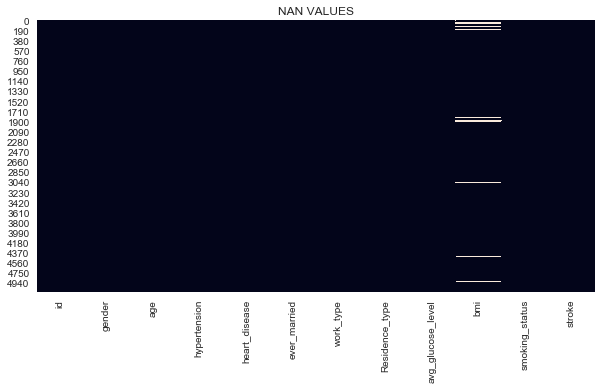

In [11]:
plt.figure(figsize=(10,5))
plt.title("NAN VALUES")
sns.set_style("dark")
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [16]:
print("MEAN OF BMI : ",df['bmi'].mean())
print("MEDIAN OF BMI : ",df['bmi'].median())
print("MODE OF BMI : ",df['bmi'].mode())
print("PERCENT OF MISSING VALUES - ",df['bmi'].isnull().mean()*100)

MEAN OF BMI :  28.893236911794673
MEDIAN OF BMI :  28.1
MODE OF BMI :  0    28.7
dtype: float64
PERCENT OF MISSING VALUES -  3.9334637964774952


### FILLING MISSING VALUE OF BMI WITH MEAN

In [197]:
mean = df['bmi'].mean()
df['bmi'].fillna(mean,inplace=True)

In [21]:
df.isnull().mean()

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### Exploratory Data Analysis

In [22]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [28]:
for col in df.columns:
    print("\nUNIQUE VALUES OF ",col,' IS - \n')
    print(df[col].unique())


UNIQUE VALUES OF  id  IS - 

[ 9046 51676 31112 ... 19723 37544 44679]

UNIQUE VALUES OF  gender  IS - 

['Male' 'Female' 'Other']

UNIQUE VALUES OF  age  IS - 

[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-

In [41]:
cat_var = []
con_var = []

for col in df.columns:
    if df[col].dtype == "O" or df[col].dtype == "int64" and len(df[col].unique())<25:
        cat_var.append(col)
    else:
        con_var.append(col)

In [59]:
cat_var

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [44]:
con_var.remove('id')
con_var

['age', 'avg_glucose_level', 'bmi']

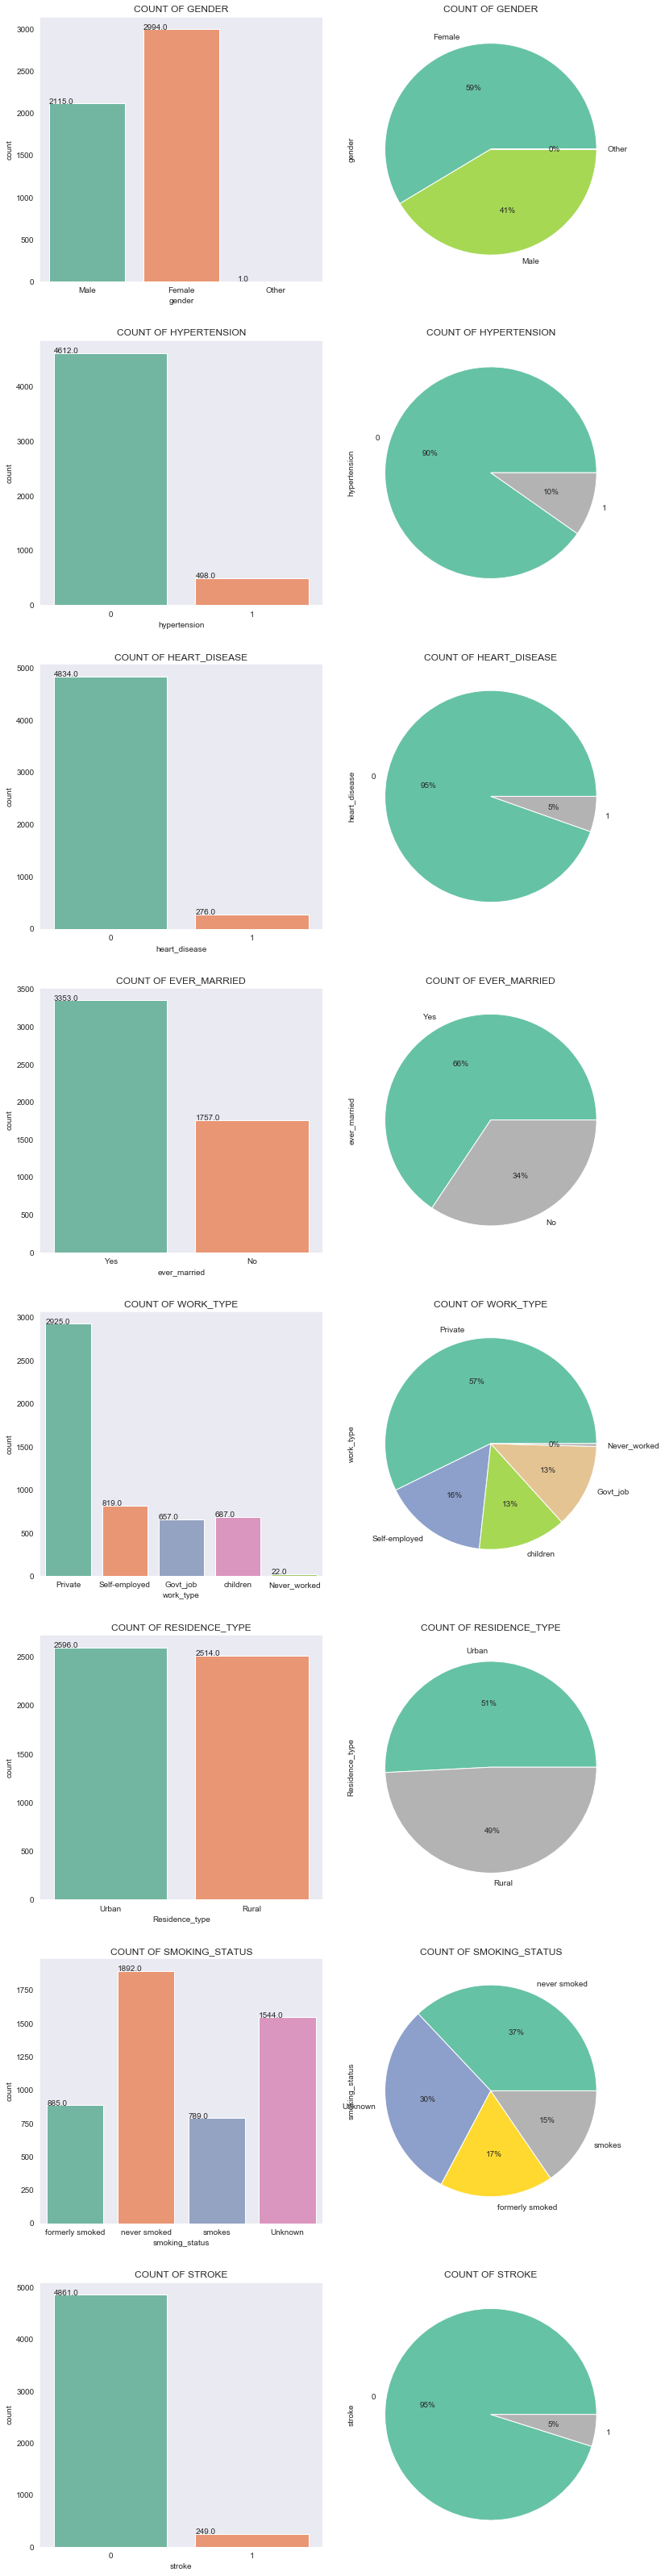

In [73]:
fig,axes = plt.subplots(8,2,figsize=(12,45))

row = 0
col = 0
for var in cat_var:
    
    # BARPLOTS
    axes[row,0].set_title("COUNT OF {}".format(var.upper()))
    axes[row,0].set_ylabel("COUNT OF CATEGORIES")
    ax = sns.countplot(df[var],ax=axes[row,col],palette='Set2')
    
    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
        
    # PIE PLOT
    axes[row,1].set_title("COUNT OF {}".format(var.upper()))
    pie = df[var].value_counts().plot('pie',ax=axes[row,1],cmap='Set2',autopct='%1.0f%%')
    row+=1
                    
plt.tight_layout(pad=3)
plt.show()

### RELATIONAL PLOTS

##### STROKE VS CONTINUOUS VARIABLES WITH CATEGORICAL VARIABLE 

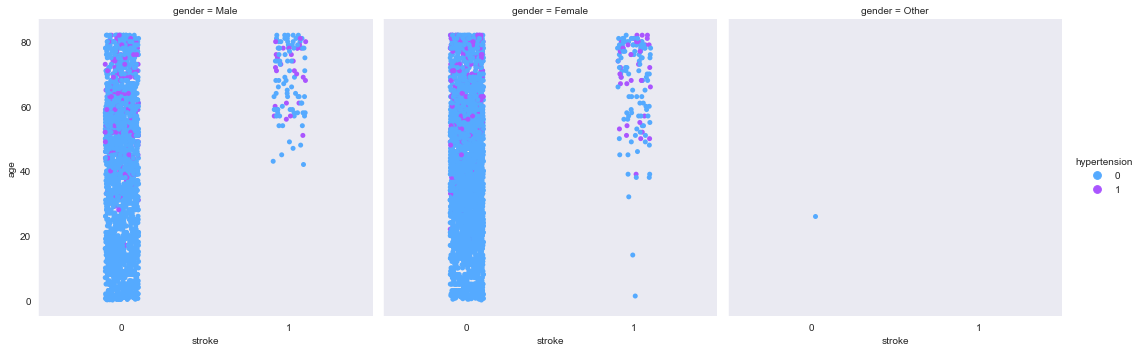

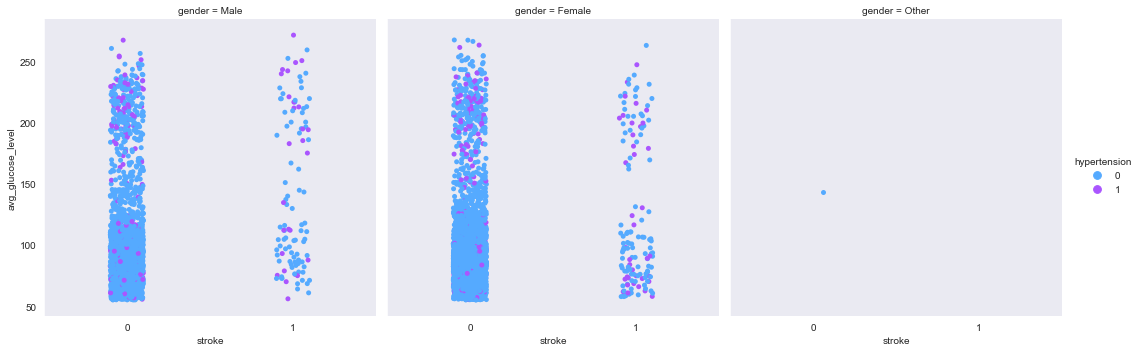

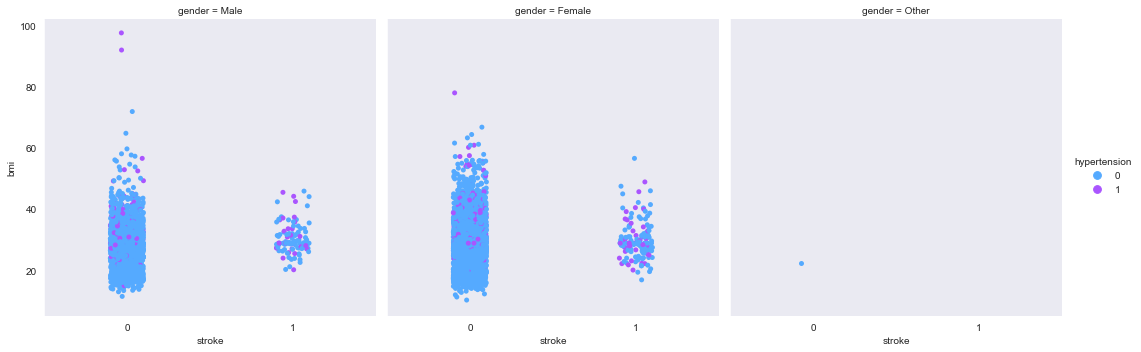

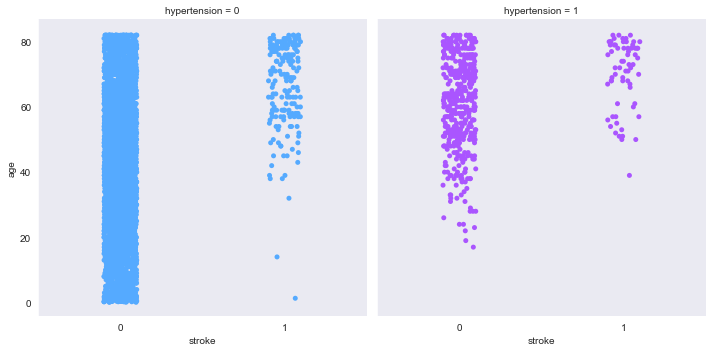

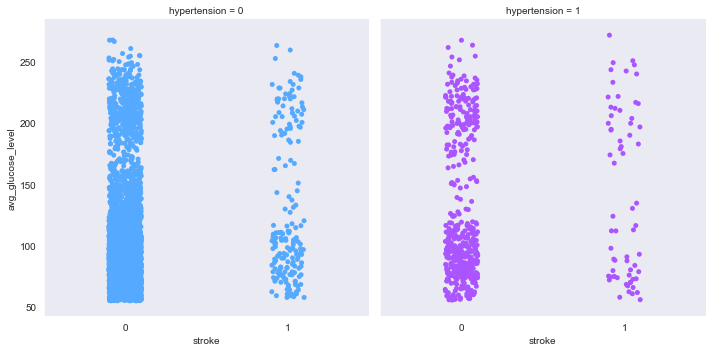

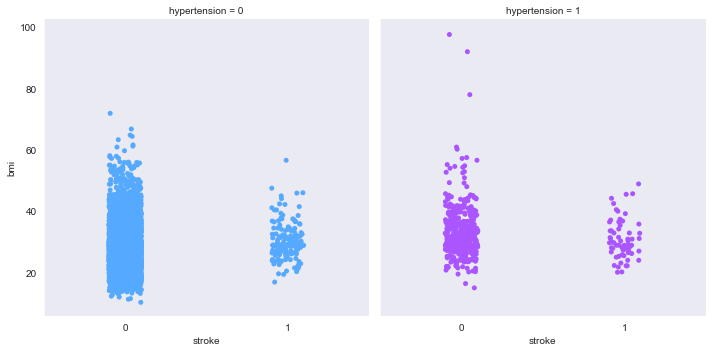

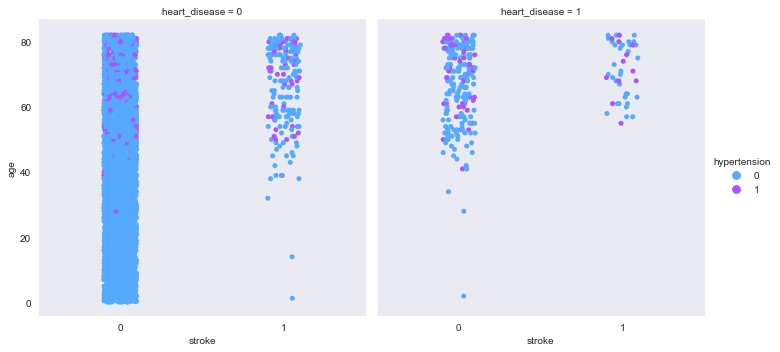

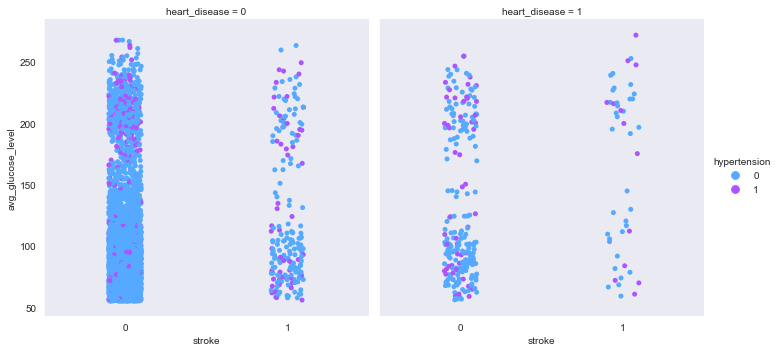

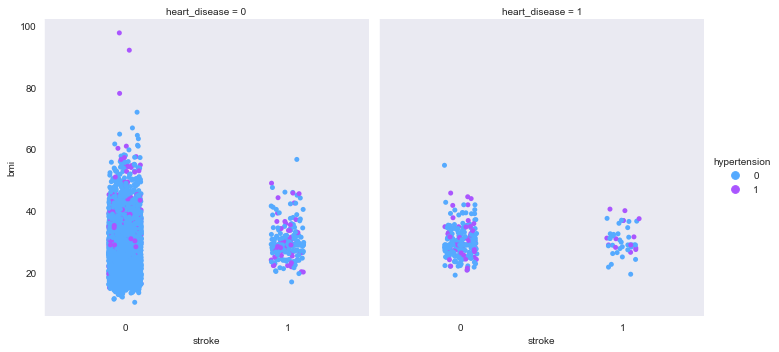

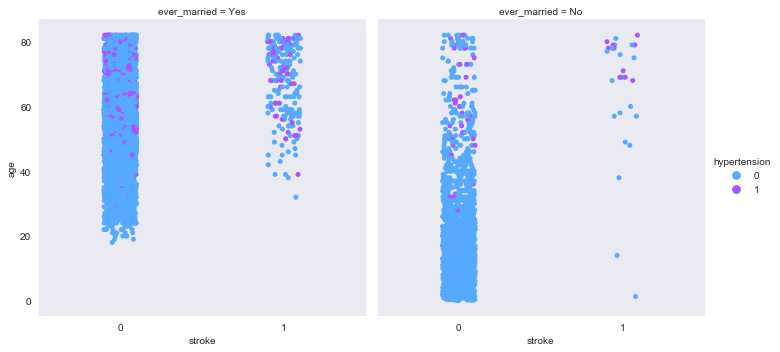

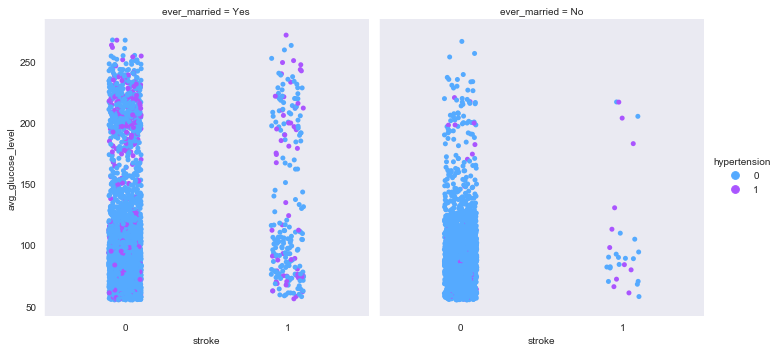

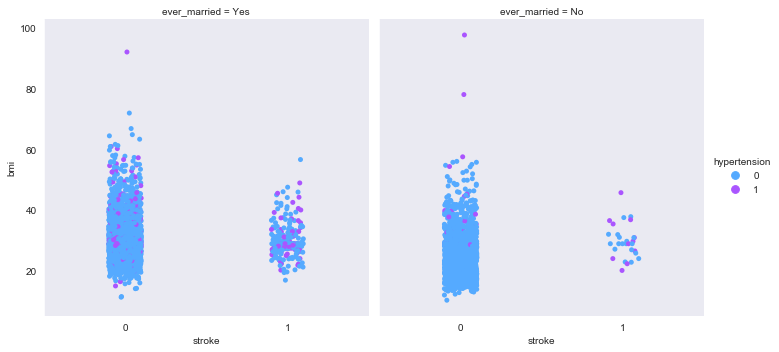

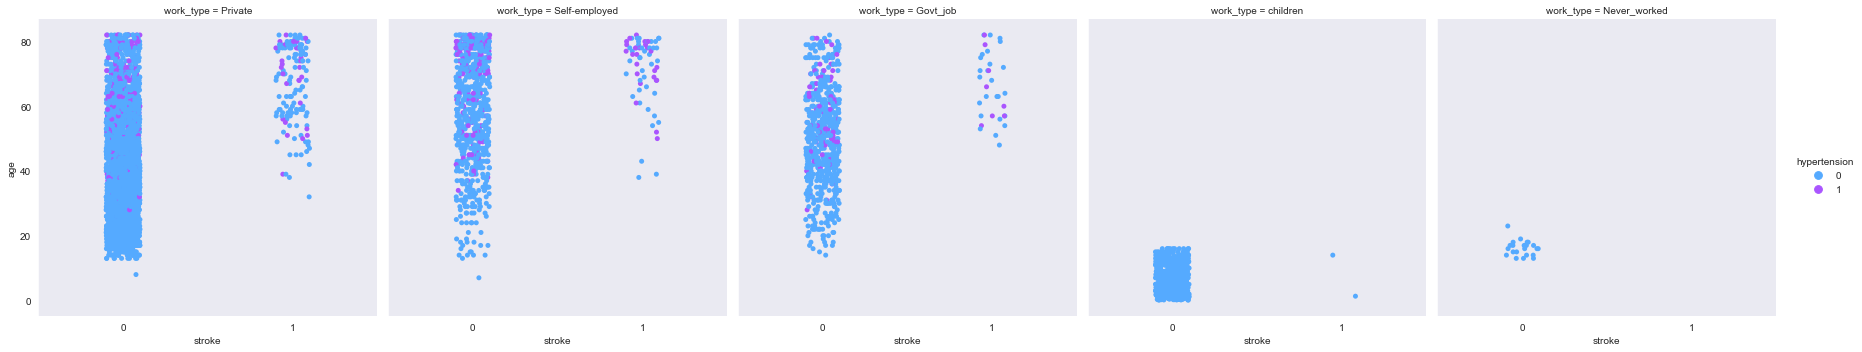

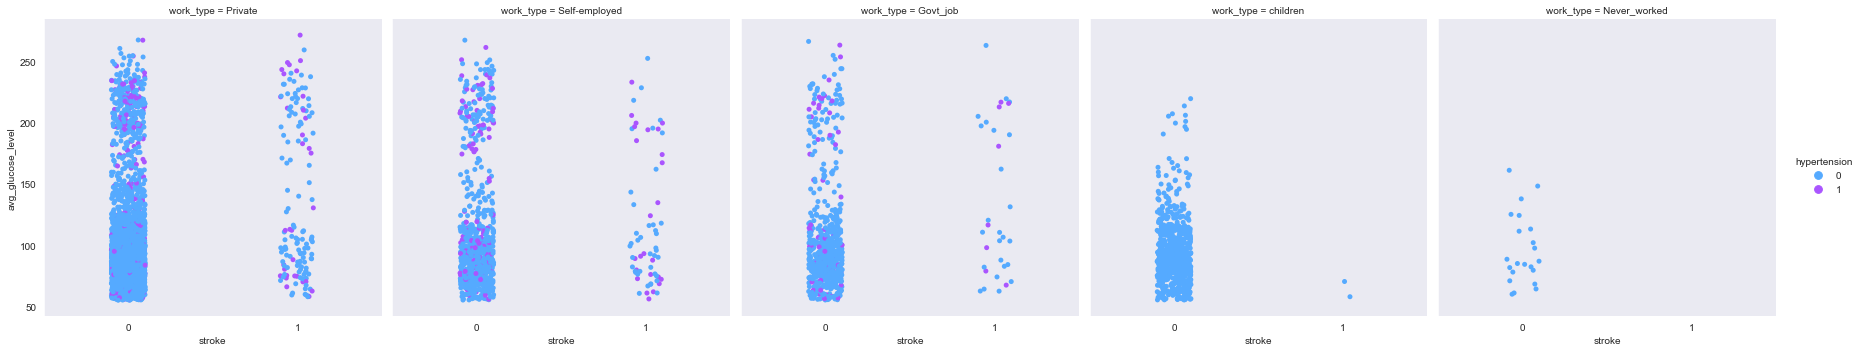

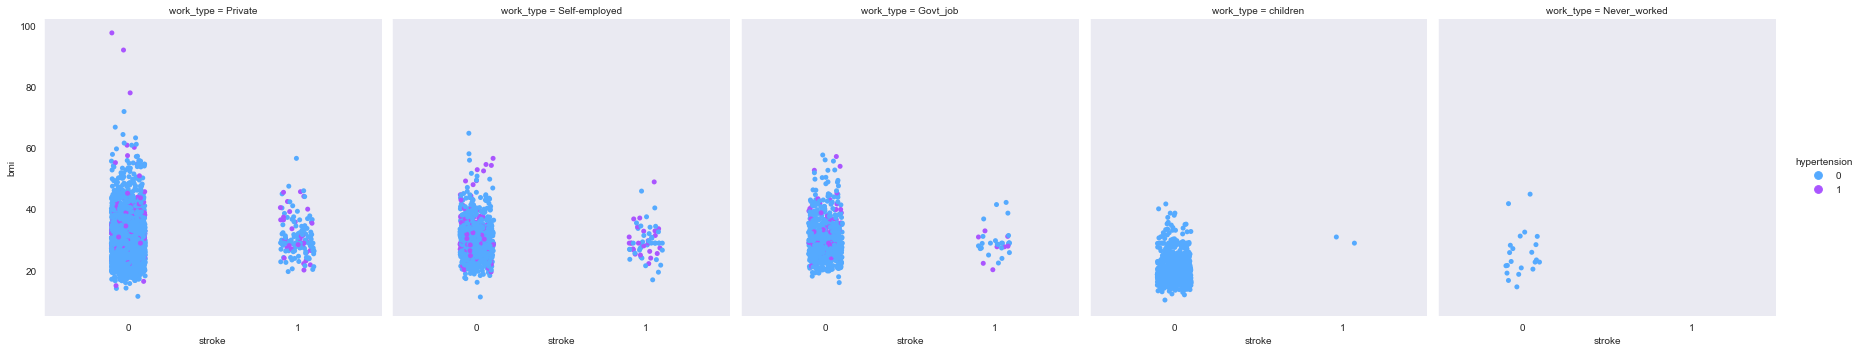

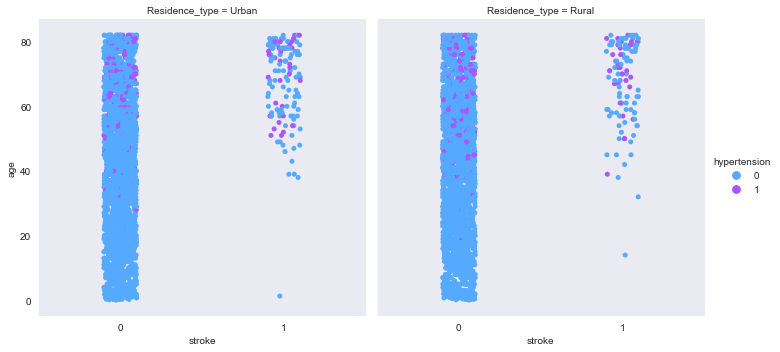

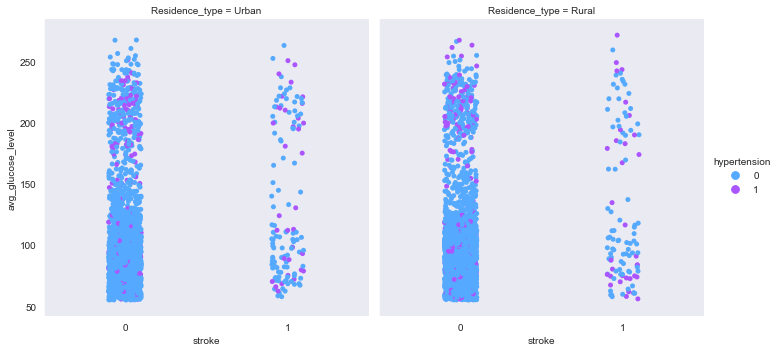

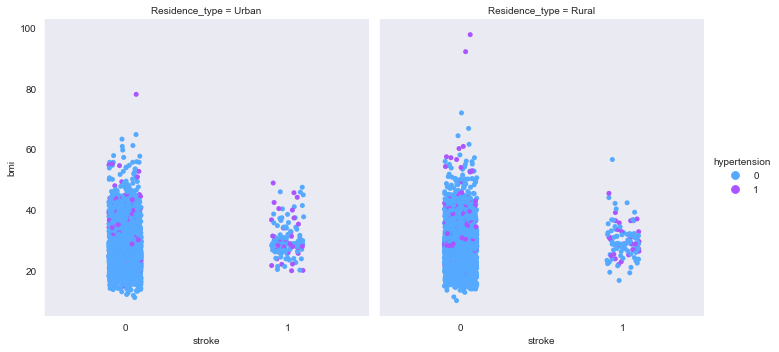

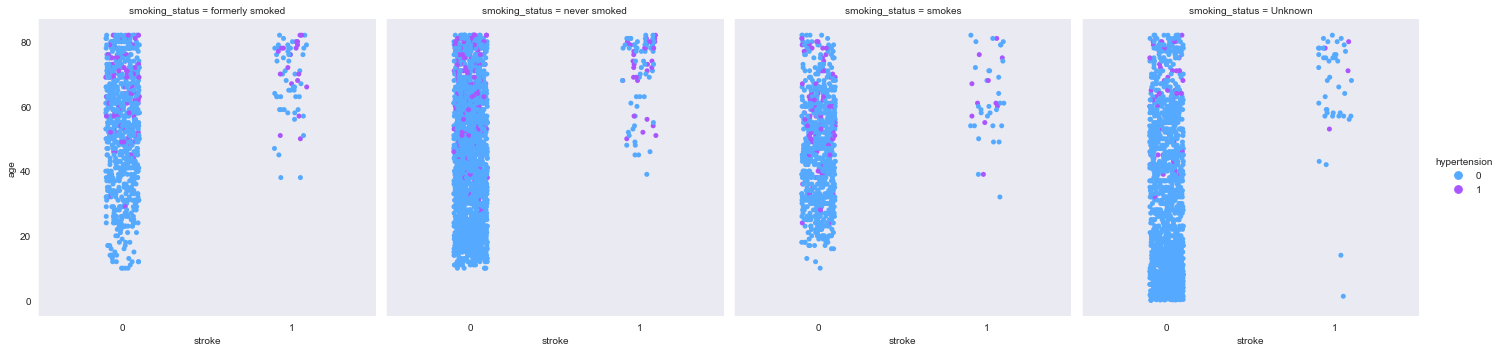

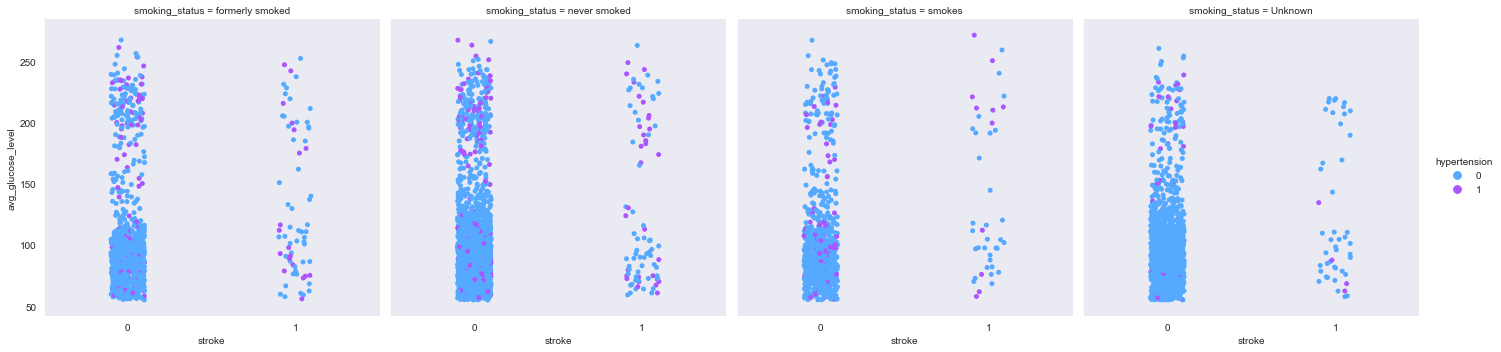

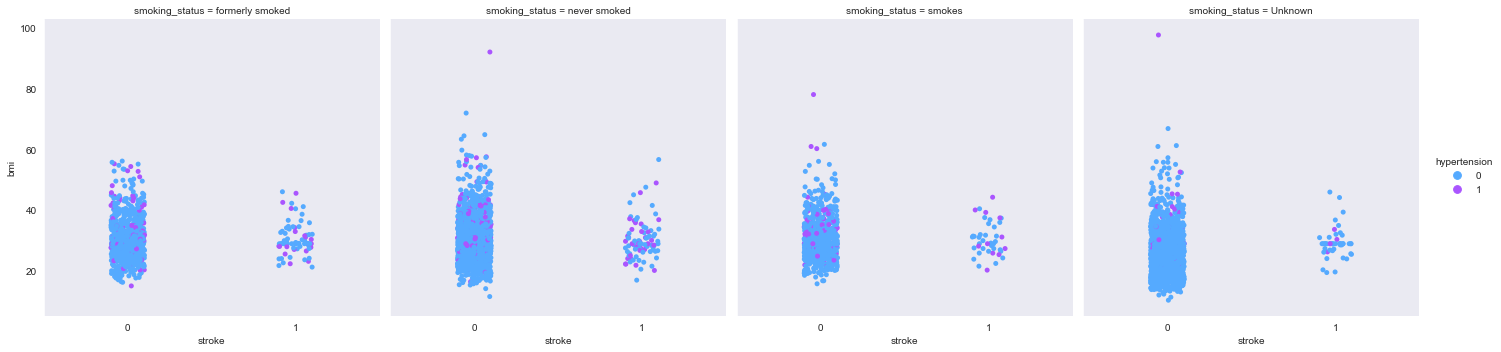

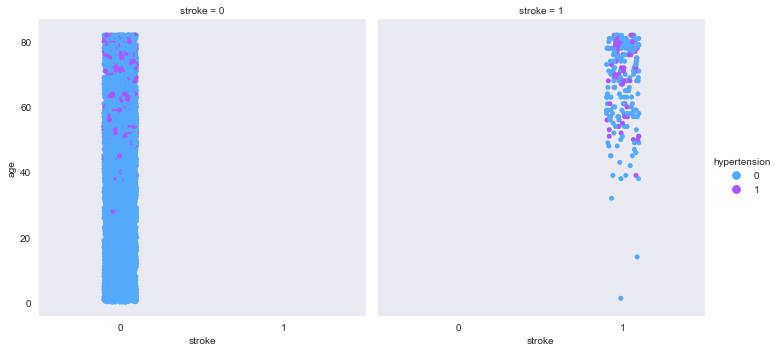

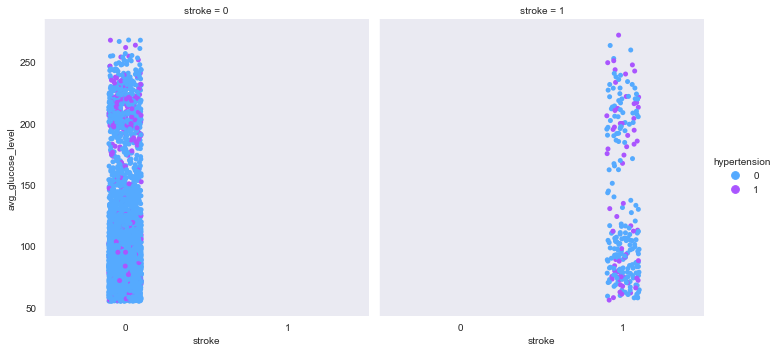

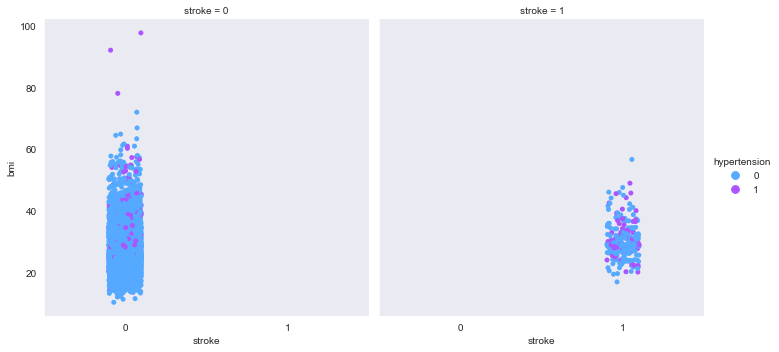

In [166]:
i = 1
for col in cat_var:    
    for var in con_var:
        sns.catplot(x='stroke',y=var,data=df,col=col,hue=cat_var[i],palette='cool')
        plt.show()

###### STROKE VS CATEGORICAL VARIABLES 

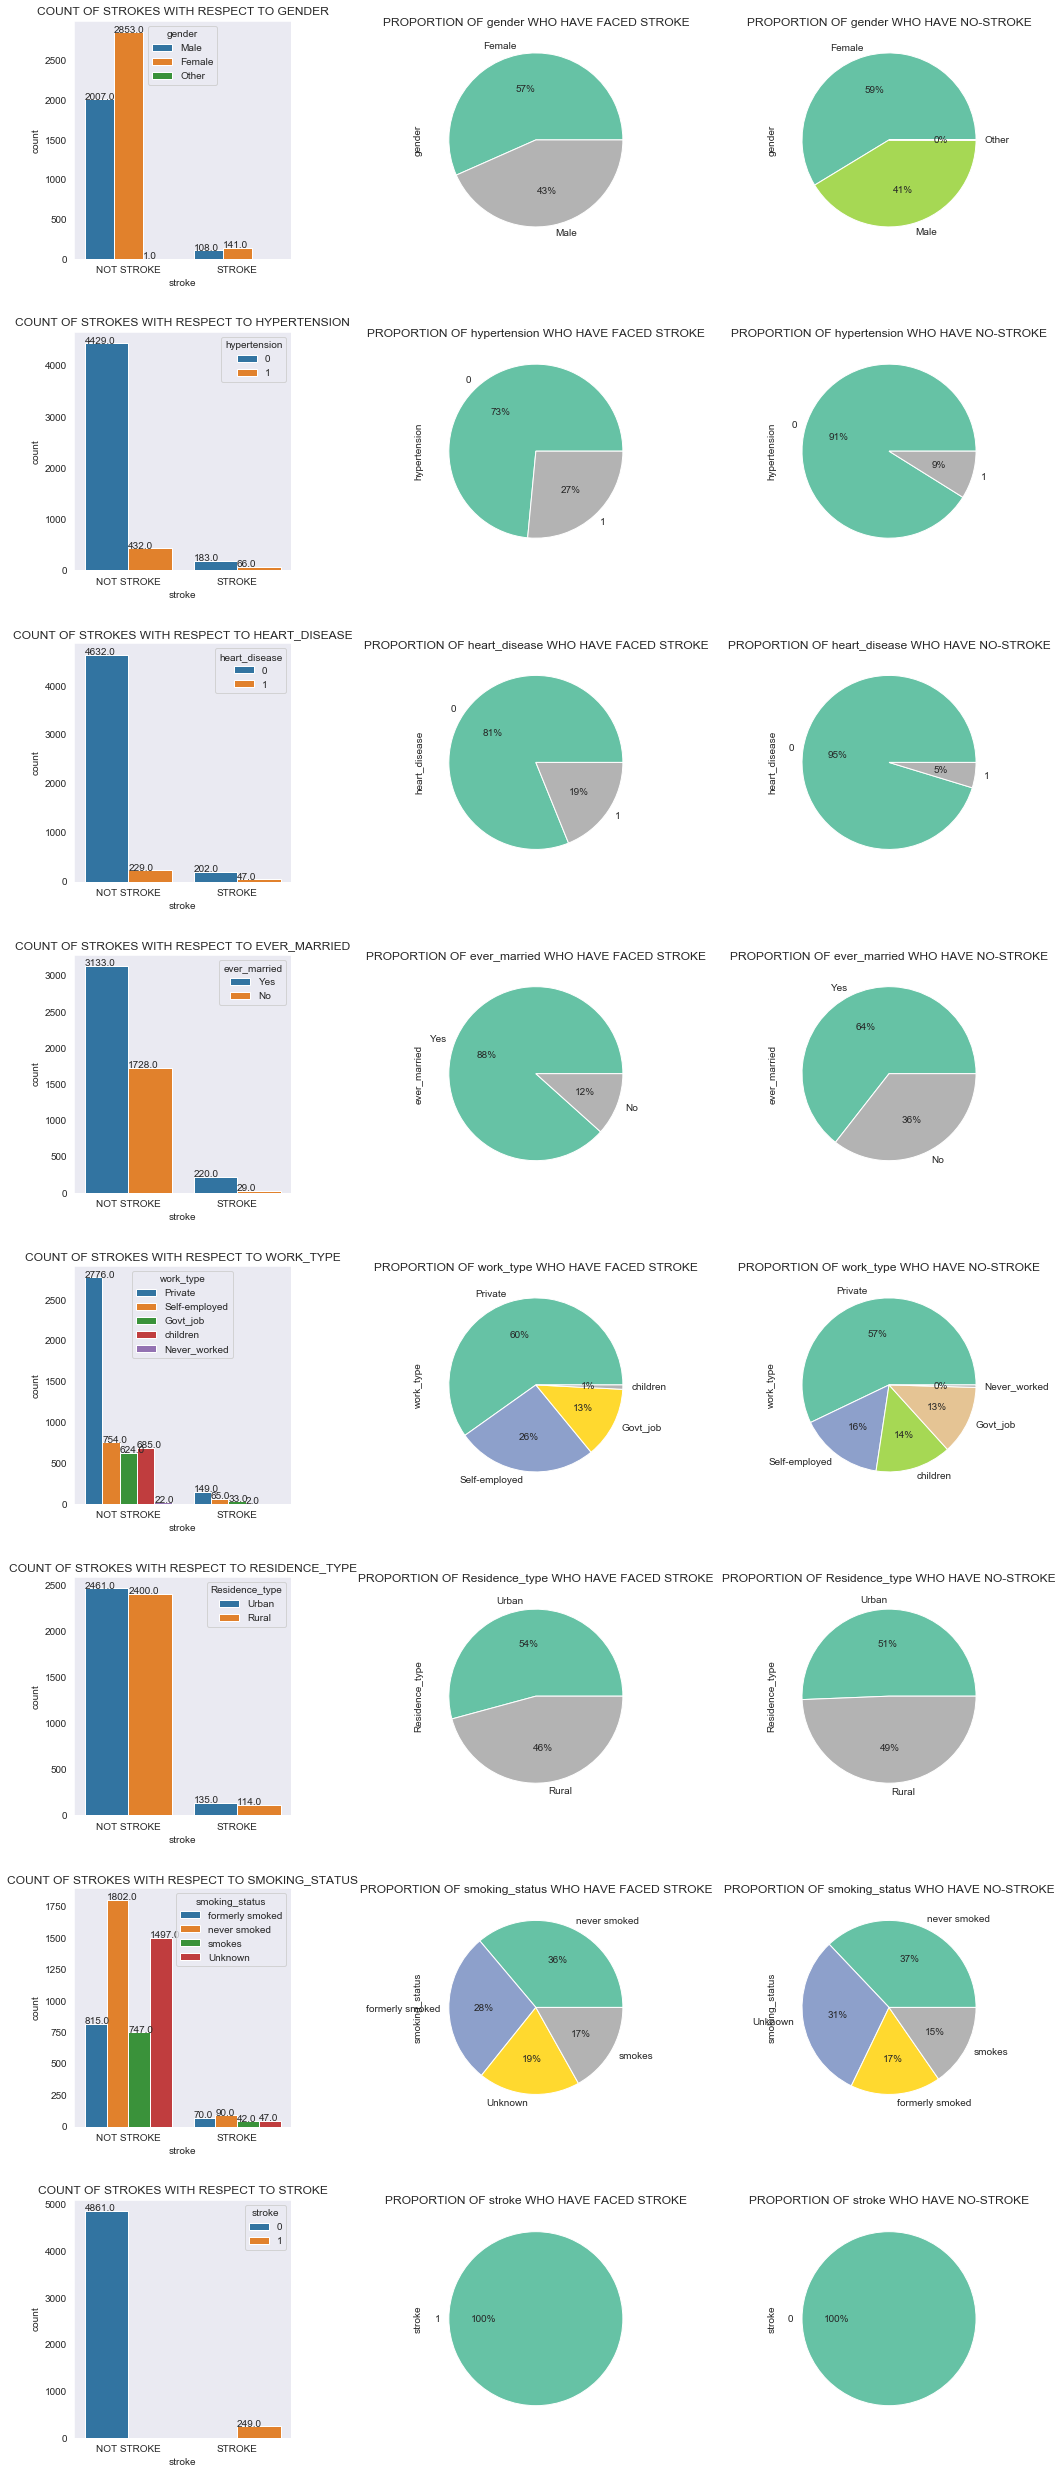

In [162]:
row=0
column=0

fig,axes = plt.subplots(8,3,figsize=(15,35))
for var in cat_var: 
    # BAR PLOT (COUNT PLOT)
    axes[row,0].set_title("COUNT OF STROKES WITH RESPECT TO {}".format(var.upper()))
    ax=sns.countplot(df['stroke'],hue=df[var],ax=axes[row,column])
    ax.set_xticklabels(labels=["NOT STROKE",'STROKE'])

    
    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))

    num-=1
    column+=1
        
    # PIE CHART
    
    #STROKE
    axes[row,column].set_title("PROPORTION OF {} WHO HAVE FACED STROKE".format(var))
    axes[row,column].set_ylabel("")
    stroke = df[df['stroke']==1][var].value_counts().plot('pie',ax=axes[row,column],cmap='Set2',autopct="%1.0f%%")
    column+=1
    # NO STROKE
    axes[row,column].set_title("PROPORTION OF {} WHO HAVE NO-STROKE".format(var))
    axes[row,column].set_ylabel("")
    non_stroke = df[df['stroke']==0][var].value_counts().plot('pie',ax=axes[row,column],cmap='Set2',autopct="%1.0f%%")
    
    if column==2:
        column=0
        row+=1

plt.tight_layout(pad=3)
plt.show()

#### DISTRIBUTIONS AND OUTLIARS OF DATA

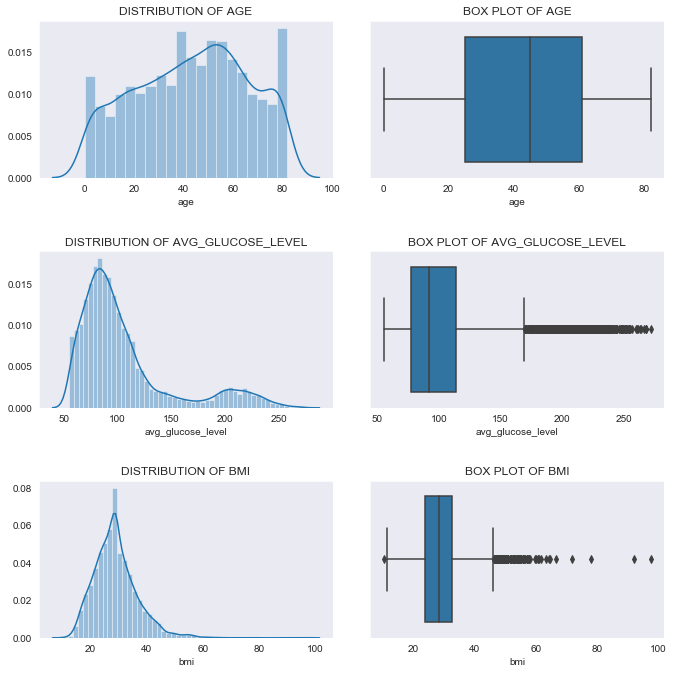

In [172]:
fig,axes = plt.subplots(3,2,figsize=(10,10))
row = 0
for var in con_var:
    sns.set_style('dark')
    # DISTPLOT - DISTRIBUTION
    axes[row,0].set_title("DISTRIBUTION OF {}".format(var.upper()))
    sns.distplot(df[var],ax=axes[row,0])
    # BOXPLOT
    axes[row,1].set_title("BOX PLOT OF {}".format(var.upper()))
    sns.boxplot(df[var],ax=axes[row,1])
    
    row+=1

plt.tight_layout(pad=3)    
plt.show()

In [198]:
df_copy = df.copy()

##### FEATURE ENGINEERING 

In [212]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,...,0,1,0,1,0,0,1,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,...,0,1,0,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,...,0,1,0,1,0,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,...,0,1,0,1,0,0,1,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,...,0,1,0,0,1,0,0,0,1,0


In [199]:
df.drop(columns=['id'],inplace=True,axis=1)

### ENCODING CATEGORIES

In [209]:
dummy = pd.get_dummies(df[['gender','ever_married','work_type','Residence_type','smoking_status']],drop_first=True)

In [211]:
df = pd.concat([df,dummy],axis=1,join='inner')

In [213]:
df.drop(columns=['gender','ever_married','work_type','Residence_type','smoking_status'],inplace=True,axis=1)

In [214]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


###### BALANCING DATASET

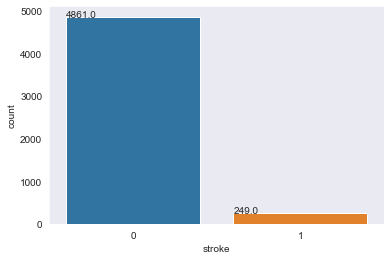

In [227]:
ax = sns.countplot(df['stroke'])

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))

In [228]:
from sklearn.utils import resample

In [229]:
df_minor = df[df['stroke']==1]
df_major = df[df['stroke']==0]

df_upsampled_minor = resample(df_minor,replace=True,n_samples=4861,random_state=69)

df_upsampled = pd.concat([df_major,df_upsampled_minor])

In [234]:
df_upsampled.reset_index(drop=True,inplace=True)

#### FEATURE SELECTION

In [216]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split

In [235]:
Y = df_upsampled['stroke']
X = df_upsampled.drop(columns=['stroke'],inplace=False) 

In [236]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=11)

In [237]:
model = ExtraTreeRegressor().fit(X_train,Y_train)

##### MODELLING

###### LOGISTIC REGRESSION

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [239]:
log = LogisticRegression().fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [241]:
log.score(X_train,Y_train)

0.7787064420727787

In [242]:
log.score(X_test,Y_test)

0.7794344473007712

In [244]:
pred = log.predict(X_test)

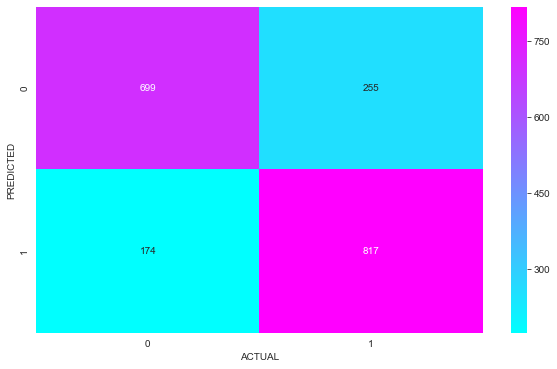

In [255]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,pred),cmap='cool',annot=True,fmt='d')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.show()

In [259]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       954
           1       0.76      0.82      0.79       991

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



#### Random Forest Classifier

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
rfc = RandomForestClassifier()

###### HYPER PARAMETER TUNING

In [265]:
from sklearn.model_selection import RandomizedSearchCV

In [272]:
# max depth
max_depth = [int(x) for x in np.linspace(5,40,8)]
# n_estimators
n_estimators = [int(x) for x in np.linspace(10,100,10)]
# min_samples_split
min_samples_split = [int(x) for x in np.linspace(100,1200,12)]
# max_features
max_features=['auto','sqrt']

In [273]:
params = {
    
    "max_depth":max_depth,
    "n_estimators":n_estimators,
    "min_samples_split":min_samples_split,
    'max_features':max_features
}

In [274]:
random_search = RandomizedSearchCV(estimator=rfc,param_distributions=params,cv=5)

In [275]:
random_search.fit(X,Y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [276]:
random_search.best_params_

{'n_estimators': 20,
 'min_samples_split': 100,
 'max_features': 'auto',
 'max_depth': 30}

In [277]:
del rfc

In [278]:
rfc = RandomForestClassifier(n_estimators=20,
                             min_samples_split= 100,
                             max_features='auto',
                             max_depth=30)

In [279]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [280]:
rfc.score(X_train,Y_train)

0.8858171531438859

In [281]:
rfc.score(X_test,Y_test)

0.87146529562982

In [282]:
pred = rfc.predict(X_test)

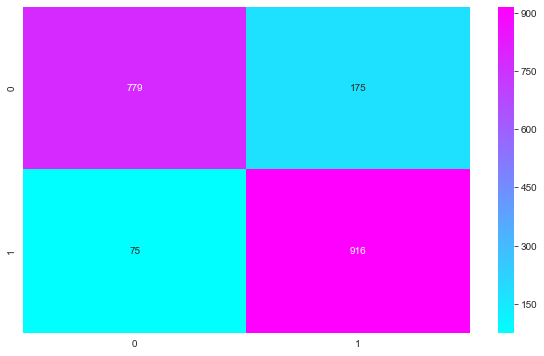

In [284]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,pred),cmap='cool',annot=True,fmt='d')
plt.show()

In [286]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       954
           1       0.84      0.92      0.88       991

    accuracy                           0.87      1945
   macro avg       0.88      0.87      0.87      1945
weighted avg       0.88      0.87      0.87      1945

